# Transformada de Fourier da função $\frac{1}{r}$ e de suas derivadas

Este código calcula a transformada de Fourier (numérica) da função

$$f\left( x, y \right) = \frac{1}{\sqrt{\left(x - x_{0} \right)^{2} + 
                                        \left(y - y_{0} \right)^{2} +
                                        \left(z_{c} - z_{0} \right)^{2}}}
$$

em relação as variáveis $x$ e $y$. Neste equação, $z_{c}$ é a coordenada vertical constante do plano sobre o qual a função $f\left( x, y \right)$ é avaliada e $x_{0}$, $y_{0}$ e $z_{0}$ são constantes que representam as coordenadas de um ponto.

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

In [3]:
rc['lines.linewidth'] = 1.
rc['font.size'] = 14

### Input

In [4]:
x0 = 0.0
y0 = 50.0
z0 = 50.0

xmin = -50.
xmax = 50.

ymin = 0.
ymax = 100.

Nx = 64
Ny = 64

dx = (xmax - xmin)/(Nx - 1)
dy = (ymax - ymin)/(Ny - 1)

x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)

x, y = np.meshgrid(x, y)

zc = np.zeros_like(x)

shape = (Nx, Ny)

In [5]:
r = np.sqrt((x-x0)**2. + (y-y0)**2. + (zc-z0)**2.)

In [6]:
c = 5.
f = c/r

### Transformada de Fourier (numérica)

In [7]:
kx, ky = np.meshgrid(2*np.pi*fftfreq(Nx, dx), 2*np.pi*fftfreq(Ny, dy))

In [8]:
kz = np.sqrt(kx**2 + ky**2)

$F\left( k_{x}, k_{y} \right) \equiv F \lbrace f\left( x, y \right) \rbrace$

In [9]:
F_f = fft2(f)

### Transformada inversa de Fourier (numérica)

$F^{-1} \lbrace F\left( k_{x}, k_{y} \right) \rbrace$

In [10]:
Finv_F = ifft2(F_f).real

### Teste de validação

In [11]:
np.allclose(Finv_F, f)

True

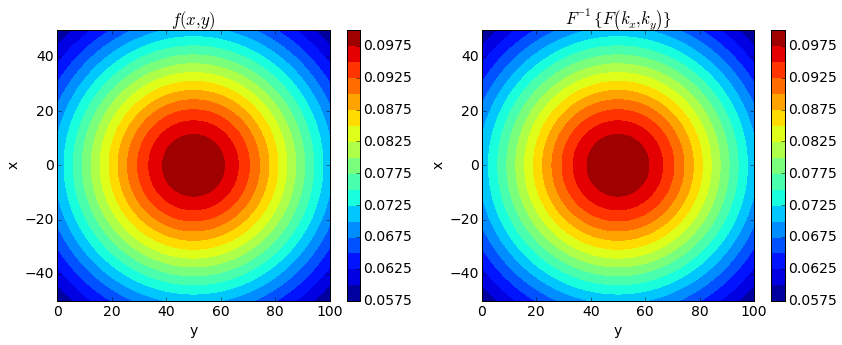

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('$f(x,y)$')
plt.contourf(y,x,f,20)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.subplot(1,2,2)
plt.title('$F^{-1} \lbrace F\left( k_{x}, k_{y} \\right) \\rbrace$')
plt.contourf(y,x,Finv_F,20)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.tight_layout()
plt.show()

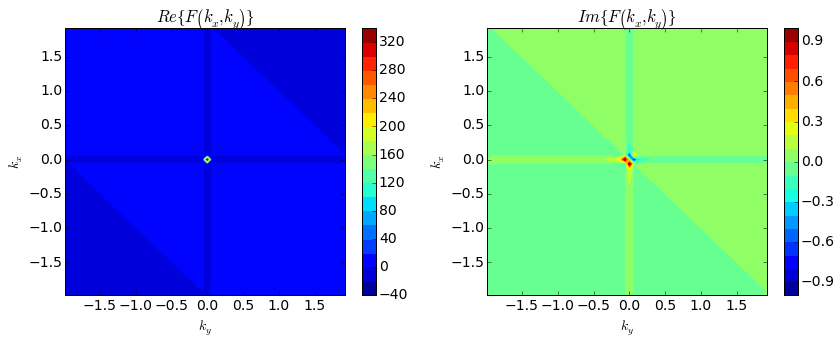

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('$Re \lbrace{ F \left( k_{x}, k_{y} \\right) \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(F_f).real,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(1,2,2)
plt.title('$Im \lbrace{ F \left( k_{x}, k_{y} \\right) \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(F_f).imag,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.tight_layout()
plt.show()

### Transformada de fourier da derivada parcial $\partial_{x} f(x,y)$

$\partial_{x} f(x,y)$

In [14]:
dx_f = -c*(x-x0)/(r**3.)

$F \lbrace \partial_{x} f(x,y) \rbrace$

In [15]:
F_dx_f = fft2(dx_f)

$i k_{x} F \lbrace f(x,y) \rbrace$

In [16]:
i_kx_F_f = 1j*kx*F_f

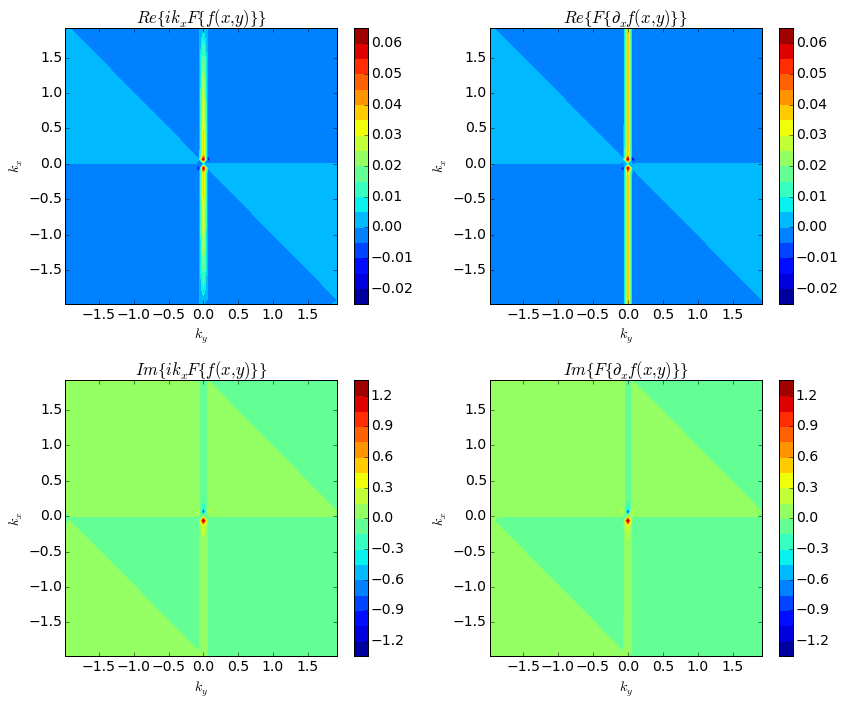

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('$Re \lbrace{ i k_{x} F \lbrace f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(i_kx_F_f).real,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(2,2,2)
plt.title('$Re \lbrace{ F \lbrace \partial_{x} f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(F_dx_f).real,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(2,2,3)
plt.title('$Im \lbrace{ i k_{x} F \lbrace f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(i_kx_F_f).imag,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(2,2,4)
plt.title('$Im \lbrace{ F \lbrace \partial_{x} f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(F_dx_f).imag,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.tight_layout()
plt.show()

$F^{-1} \lbrace F \lbrace \partial_{x} f(x,y) \rbrace \rbrace$

In [18]:
Finv_F_dx_f = ifft2(F_dx_f)

$F^{-1} \lbrace i k_{x} F \lbrace f(x,y) \rbrace \rbrace$

In [19]:
Finv_i_kx_F_f = ifft2(i_kx_F_f)

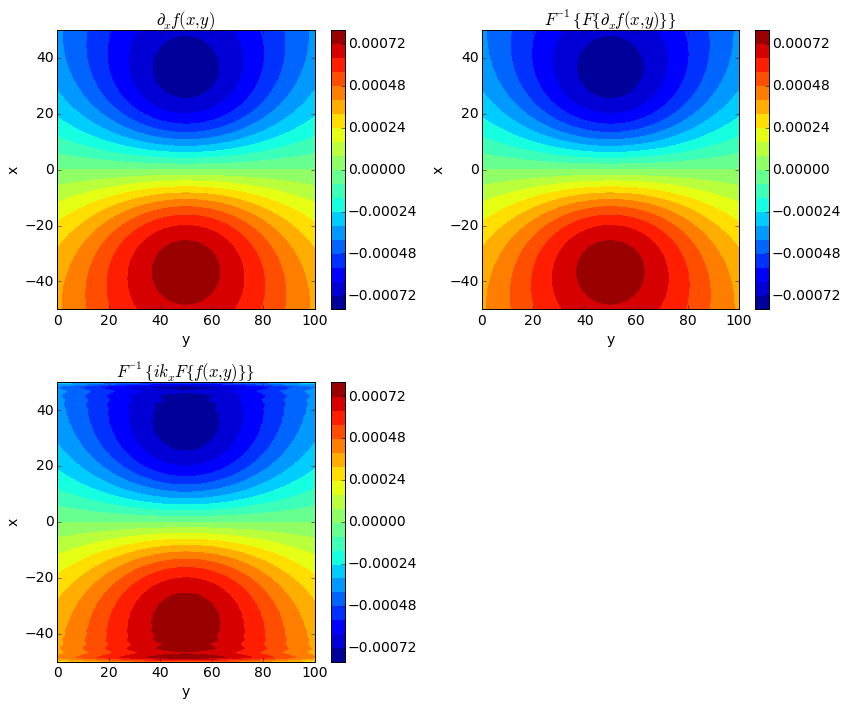

In [20]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('$\partial_{x} f(x,y)$')
plt.contourf(y,x,dx_f,20)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.subplot(2,2,2)
plt.title('$F^{-1} \lbrace F \lbrace \partial_{x} f(x,y) \\rbrace \\rbrace$')
plt.contourf(y,x,Finv_F_dx_f.real,20)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.subplot(2,2,3)
plt.title('$F^{-1} \lbrace i k_{x} F \lbrace f(x,y) \\rbrace \\rbrace$')
plt.contourf(y,x,Finv_i_kx_F_f.real,20)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.tight_layout()
plt.show()

In [22]:
dz_f = -c*(zc - z0)/(r**3.)

In [23]:
F_dz_f = fft2(dz_f)

In [36]:
F_dz_true = kz*F_f

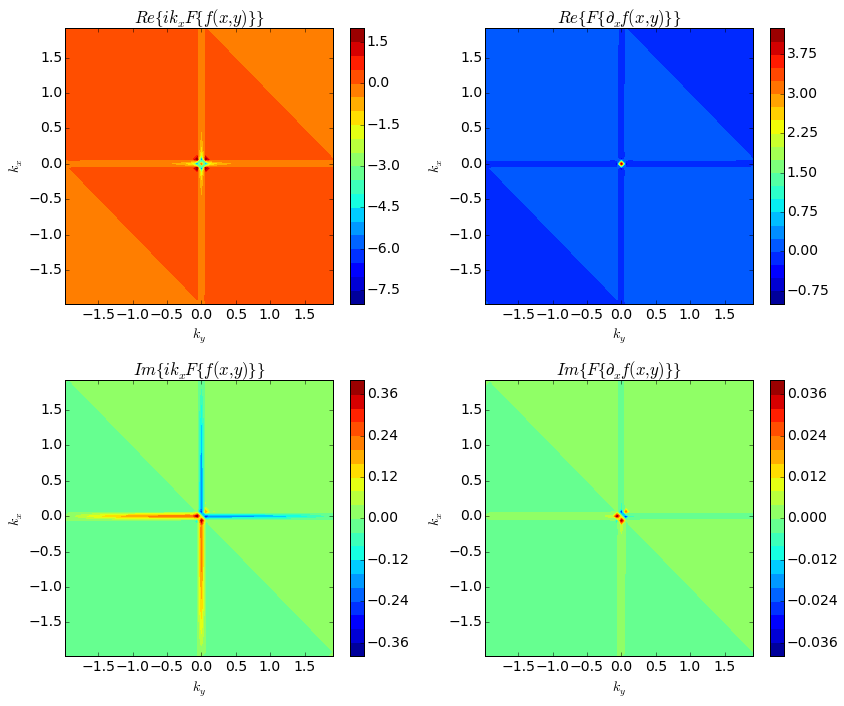

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('$Re \lbrace{ i k_{x} F \lbrace f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(kz_F_f).real,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(2,2,2)
plt.title('$Re \lbrace{ F \lbrace \partial_{x} f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(F_dz_f).real,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(2,2,3)
plt.title('$Im \lbrace{ i k_{x} F \lbrace f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(kz_F_f).imag,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.subplot(2,2,4)
plt.title('$Im \lbrace{ F \lbrace \partial_{x} f(x,y) \\rbrace \\rbrace}$')
plt.contourf(fftshift(ky),fftshift(kx),fftshift(F_dz_f).imag,20)
plt.colorbar()
plt.xlabel('$k_{y}$')
plt.ylabel('$k_{x}$')
plt.tight_layout()
plt.show()